<h1><center> Insights into US Airbnb Listing Metrics using Zillow Home Value Index and Real Estate Data</center></h1>


---
### *An analysis of Airbnb listings in popular US travel destinations in conjuction with Zillow's residential real estate data to predict price, value, popularity of Airbnb listings given the housing climate of a US city.*
---
### This exploration will be conducted in four parts:
**Part 1:**  *What are the Airbnb listing trends in the U.S. Market? *

** Part 2:**  *Are there certain real estate metrics that highly influence Airbnb metrics in U.S. cities? *

**Part 3:** *Given listing trends, develop indices that measure these trends and a model that can predict them given the Zillow Housing Value Index.*

**Part 4:** *How can Airbnb leverage these insights to improve thier product and marketing?*



Airbnb Data Source: http://insideairbnb.com/

Zillow Data Source: http://www.zillow.com/research/data/

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import *
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [4]:
def read_data(location):
    location = location[['id', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_value']]
    return location

def get_stats(location):
    x = ['accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_value']
    location = location.loc[:, x]
    location_stats = location.describe()
    location_stats = concat([location_stats.ix[0:4], location_stats.ix[7:]])
    return location_stats

def reorder(location):
    new = location.set_index('location', append = True).unstack(0)
    return new

---
# The Airbnb Data

## a) Reading and Cleaning:

In [5]:
austin = read_csv('austin.csv')
austin = read_data(austin)
austin['price'] = austin['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

boston = read_csv('boston.csv')
boston = read_data(boston)
boston['price'] = boston['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

dc = read_csv('dc.csv')
dc = read_data(dc)
dc['price'] = dc['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

denver = read_csv('denver.csv')
denver = read_data(denver)
denver['price'] = denver['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

la = read_csv('la.csv')
la = read_data(la)
la['price'] = la['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

nashville = read_csv('nashville.csv')
nashville = read_data(nashville)
nashville['price'] = nashville['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

nyc = read_csv('nyc.csv')
nyc = read_data(nyc)
nyc['price'] = nyc['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

portland = read_csv('portland.csv')
portland = read_data(portland)
portland['price'] = portland['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sandiego = read_csv('sandiego.csv')
sandiego = read_data(sandiego)
sandiego['price'] = sandiego['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

seattle = read_csv('seattle.csv')
seattle = read_data(seattle)
seattle['price'] = seattle['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sf = read_csv('sf.csv')
sf = read_data(sf)
sf['price'] = sf['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

neworleans = read_csv('new_orleans.csv')
neworleans = read_data(neworleans)
neworleans['price'] = neworleans['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

A look into the Airbnb listing features provided for each city by the data:

In [479]:
austin.columns.values

array(['id', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'price',
       'minimum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_value'], dtype=object)

## b) Getting Statistics on Airbnb Data:

Creating a dataframe to house statistical summaries of the listing data so that we can analyze listing trends.

In [6]:
austin_s = get_stats(austin)
austin_s['location'] = 'Austin, TX'
austin_s = reorder(austin_s)

boston_s = get_stats(boston)
boston_s['location'] = 'Boston, MA'
boston_s = reorder(boston_s)

dc_s = get_stats(dc)
dc_s['location'] = 'Washington, DC'
dc_s = reorder(dc_s)

denver_s = get_stats(denver)
denver_s['location'] = 'Denver, CO'
denver_s = reorder(denver_s)

la_s = get_stats(la)
la_s['location'] = 'Los Angeles-Long Beach-Anaheim, CA'
la_s = reorder(la_s)

nashville_s = get_stats(nashville)
nashville_s['location'] = 'Nashville, TN'
nashville_s = reorder(nashville_s)

nyc_s = get_stats(nyc)
nyc_s['location'] = 'New York, NY'
nyc_s = reorder(nyc_s)

portland_s = get_stats(portland)
portland_s['location'] = 'Portland, OR'
portland_s = reorder(portland_s)

sandiego_s = get_stats(sandiego)
sandiego_s['location'] = 'San Diego, CA'
sandiego_s = reorder(sandiego_s)

seattle_s = get_stats(seattle)
seattle_s['location'] = 'Seattle, WA'
seattle_s = reorder(seattle_s)

sf_s = get_stats(sf)
sf_s['location'] = 'San Francisco, CA'
sf_s = reorder(sf_s)

neworleans_s = get_stats(neworleans)
neworleans_s['location'] = 'New Orleans, LA'
neworleans_s = reorder(neworleans_s)

statistics = concat([austin_s, boston_s, dc_s, denver_s, la_s, nashville_s, nyc_s, portland_s, sandiego_s, seattle_s, sf_s, neworleans_s])
statistics.head(2)

accommodates                                bathrooms       \
                  count   max      mean  min       std     count  max   
location                                                                
Austin, TX       5835.0  16.0  4.388175  1.0  2.689056    5789.0  8.0   
Boston, MA       3585.0  16.0  3.041283  1.0  1.778929    3571.0  6.0   

                                       ...    review_scores_accuracy        \
                mean  min       std    ...                     count   max   
location                               ...                                   
Austin, TX  1.479617  0.0  0.774630    ...                    3776.0  10.0   
Boston, MA  1.221647  0.0  0.501487    ...                    2762.0  10.0   

                                    review_scores_value                       \
                mean  min       std               count   max      mean  min   
location                                                                       
Austin, TX  9.645657  2.0  0.757809              3778.0  10.0  9.416093  2.0   
Boston, MA  9.431571  2.0  0.931863              2764.0  10.0  9.168234  2.0   

                      
                 std  
location              
Austin, TX  0.892991  
Boston, MA  1.011116  

[2 rows x 50 columns]

Columns included in statistical summary:

In [421]:
statistics.columns.values

array([('accommodates', 'count'), ('accommodates', 'max'),
       ('accommodates', 'mean'), ('accommodates', 'min'),
       ('accommodates', 'std'), ('bathrooms', 'count'),
       ('bathrooms', 'max'), ('bathrooms', 'mean'), ('bathrooms', 'min'),
       ('bathrooms', 'std'), ('bedrooms', 'count'), ('bedrooms', 'max'),
       ('bedrooms', 'mean'), ('bedrooms', 'min'), ('bedrooms', 'std'),
       ('price', 'count'), ('price', 'max'), ('price', 'mean'),
       ('price', 'min'), ('price', 'std'), ('minimum_nights', 'count'),
       ('minimum_nights', 'max'), ('minimum_nights', 'mean'),
       ('minimum_nights', 'min'), ('minimum_nights', 'std'),
       ('availability_365', 'count'), ('availability_365', 'max'),
       ('availability_365', 'mean'), ('availability_365', 'min'),
       ('availability_365', 'std'), ('number_of_reviews', 'count'),
       ('number_of_reviews', 'max'), ('number_of_reviews', 'mean'),
       ('number_of_reviews', 'min'), ('number_of_reviews', 'std'),
       ('revie

---

# Part 1: Exploring Airbnb Data -- Listing Trends in U.S. Cities

### Count of Listings per City: Which cities have the most listings?

New York and Los Angeles are outliers with a relatively far larger amount of listings than the others. This high supply of listings suggests that they are the more popular travel destinations. San Francsico comes in third and San Diego fourth. 

As expected, smaller and less frequented cities Portland, Nashville and Denver have the least amount of listings.

In [507]:
x = {'Austin': len(austin), 'Boston' : len(boston), 
     'Washington' : len(dc), 'Denver' : len(denver), 
     'Los Angeles': len(la), 'Nashville': len(nashville), 
     'New York': len(nyc), 'Portland' : len(portland), 
     'San Diego' : len(sandiego), 'Seattle' : len(seattle), 
     'San Francisco' : len(sf), 'New Orleans' : len(neworleans) }

df = DataFrame(x, index=[0]).stack()
df = DataFrame(df).sort([0], ascending=[False]).reset_index(0)
df[0]

New York         39553
Los Angeles      26080
San Francisco     8619
San Diego         6608
Austin            5835
New Orleans       4514
Seattle           3818
Washington        3723
Boston            3585
Portland          3360
Nashville         3277
Denver            2505
Name: 0, dtype: int64

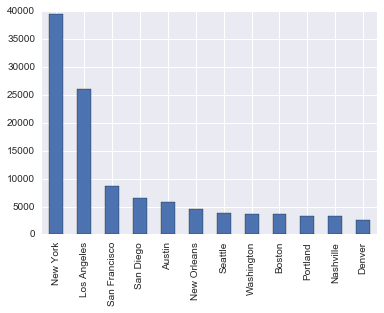

In [508]:
df[0].plot(kind = 'bar')

### Average Price per City: Where is it the most and least expensive to stay, on average, at an Airbnb listing?

Austin, San Francisco and Nashville have the most expensive listing prices on average, while Denver, Seattle and  Portland are the cheaper places to stay, on average. 

A high price might suggest that the supply of listings is low and therefore hosts are not competitive when it comes to price. The two citites with the highest number fo listings, New York adn Los Angeles have prices that fall at the lower end of the distribution, which may suggest that a higher number of listings makes the market more competitive and drives prices down. 

In [419]:
DataFrame(statistics['price']['mean'].convert_objects(convert_numeric=True)).sort(['mean'], ascending=[False])

,mean
location,
"Austin, TX",231.503207
"San Francisco, CA",208.376430
"Nashville, TN",188.836252
"San Diego, CA",183.789750
"New Orleans, LA",172.031998
"Boston, MA",169.072768
"Los Angeles-Long Beach-Anaheim, CA",146.567610
"Washington, DC",142.323251
"New York, NY",140.057827


### Average Availability of Listings: What cities are more popular to visit?

The metric measured here is the average number of available days that can be booked in the next year. The lower the availibility the more popular a city is. The most popular travel destinations for users are San Francisco, New York, Boston. These are large cities so this makes logical sense.

Interestingly, Portland and Denver come in as the fourth and fifth most popular. These citites' listings are characterized by a low number of listings and low price. Users may be drawn to these cities due to thier low prices.

In [510]:
DataFrame(statistics['availability_365']['mean'].convert_objects(convert_numeric=True)).sort(['mean'], ascending=[True])

,mean
location,
"San Francisco, CA",143.499594
"New York, NY",157.473592
"Boston, MA",179.346444
"Portland, OR",194.518750
"Denver, CO",195.011976
"San Diego, CA",201.976998
"New Orleans, LA",213.259194
"Nashville, TN",219.202014
"Los Angeles-Long Beach-Anaheim, CA",222.421396


### Price and Availibility Listings: What the relationship between the popularity of a listing and its price?
There seems to a positive coorelation beetween the price and percent availibility of a listing. 

This means that the more/less popular a listing(lower/higher the % Availabiliy) the lower/higher the price. This seems to be in line with the logic that cities which are popular to travel to must be more competive on price, which drives them down. 

Some outliers are San Francisco which is popular, but still more expensive and Austin which is expensive as well but ont he lower end of the popularity spectrum. 

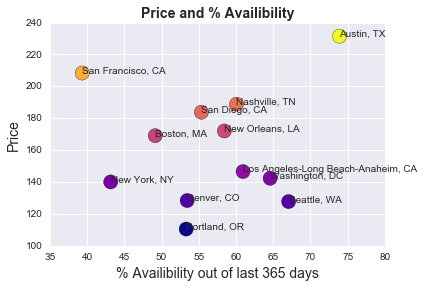

In [11]:
x = ((statistics['availability_365']['mean'] / 365)*100).convert_objects(convert_numeric=True)
y = statistics['price']['mean'].convert_objects(convert_numeric=True)

n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y,cmap ='plasma', s =200)

for i, txt in benumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('% Availability out of last 365 days', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and % Availability', fontsize=14, fontweight='bold')

### Price and Average Rating: How does the average quality of a listing coorelate to the average price?
The data here is very dispersed and suggests that ratings and price do not have a clear relationship. 

This reveals an interesting quality of Airbnb listings relative to the traditional hotel industry. Even if a user pays more or less for a listing this does not have much to do with the quality of thier stay. In the traditional hotel industry the quality of your stay is very driven by the price (hotel vs. motel). Usually the more one pays the better your stay, whereas Airbnb users can pay minimally and have a great experience (Portland) or the other way around (Boston for example, has a low rating for its average price).

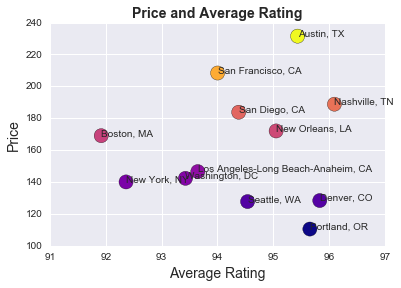

In [17]:
x = statistics['review_scores_rating']['mean'].convert_objects(convert_numeric=True)
y = statistics['price']['mean'].convert_objects(convert_numeric=True)

n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y,cmap ='plasma', s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and Average Rating', fontsize=14, fontweight='bold')

---

# The Zillow Real Estate Data

**TO ADD: Descriptions and Derivations of these metrics under thier titles**

### Zillow Home Value Index (Median Home Value):

In [26]:
ZHVI = read_csv('Metro_Zhvi_Summary_AllHomes (1).csv').set_index('RegionName')


x = ['Austin, TX', 'Boston, MA', 'Chicago, IL', 'Washington, DC', 'Denver, CO', 'Los Angeles-Long Beach-Anaheim, CA', 'Nashville, TN', 'New York, NY', 'Portland, OR', 'San Diego, CA', 'Seattle, WA', 'San Francisco, CA', 'New Orleans, LA']
y = ['Zhvi', 'MoM', 'QoQ', 'YoY', '5Year', '10Year']

ZHVI = ZHVI.loc[x , y ]

### Difference in Median List Price and Median Sold Price in 2016:

In [27]:
median_listing_price = read_csv('Metro_MedianListingPrice_AllHomes (1).csv')
median_listing_price = median_listing_price.set_index('RegionName')


x = ['Austin, TX', 'Boston, MA', 'Chicago, IL', 'Washington, DC', 'Denver, CO', 'Los Angeles-Long Beach-Anaheim, CA', 'Nashville, TN', 'New York, NY', 'Portland, OR', 'San Diego, CA', 'Seattle, WA', 'San Francisco, CA', 'New Orleans, LA']
y = ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10']

median_listing_price = median_listing_price.loc[x , y ].mean(axis =1)


median_sold_price = read_csv('Metro_MedianSoldPrice_AllHomes.csv')
median_sold_price = median_sold_price.set_index('RegionName')

x = ['Austin, TX', 'Boston, MA', 'Chicago, IL', 'Washington, DC', 'Denver, CO', 'Los Angeles-Long Beach-Anaheim, CA', 'Nashville, TN', 'New York, NY', 'Portland, OR', 'San Diego, CA', 'Seattle, WA', 'San Francisco, CA','New Orleans, LA']
y = ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06']

median_sold_price = median_sold_price.loc[x , y].mean(axis=1)

delta = median_listing_price - median_sold_price

### Median Income:

In [28]:
med_inc = read_csv('Affordability_Income_2016Q3 (1).csv').set_index('RegionName')

x = ['Austin, TX', 'Boston, MA', 'Chicago, IL', 'Washington, DC', 'Denver, CO', 'Los Angeles-Long Beach-Anaheim, CA', 'Nashville, TN', 'New York, NY', 'Portland, OR', 'San Diego, CA', 'Seattle, WA', 'San Francisco, CA','New Orleans, LA']
y1 = ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10']

#median income 2016
med_inc_2016 = med_inc.loc[x, y1].mean(axis=1)
med_inc_2016

#percent increase in median income since 2000
y2 = ['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10']
med_inc_2000 = med_inc.loc[x, y2].mean(axis=1)

inc_med_inc = (med_inc_2016 - med_inc_2000) / med_inc_2000

### Price to Rent Ratio:

In [29]:
price_to_rent = read_csv('Metro_PriceToRentRatio_AllHomes.csv').set_index('RegionName')

x = ['Austin, TX', 'Boston, MA', 'Chicago, IL', 'Washington, DC', 'Denver, CO', 'Los Angeles-Long Beach-Anaheim, CA', 'Nashville, TN', 'New York, NY', 'Portland, OR', 'San Diego, CA', 'Seattle, WA', 'San Francisco, CA','New Orleans, LA']
y = ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10']

price_to_rent = price_to_rent.loc[x, y].mean(axis=1)

### % Homes with Increasing Value:

In [30]:
incr_val = read_csv('Metro_PctOfHomesIncreasingInValues_AllHomes.csv').set_index('RegionName')

x = ['Austin, TX', 'Boston, MA', 'Chicago, IL', 'Washington, DC', 'Denver, CO', 'Los Angeles-Long Beach-Anaheim, CA', 'Nashville, TN', 'New York, NY', 'Portland, OR', 'San Diego, CA', 'Seattle, WA', 'San Francisco, CA','New Orleans, LA']
y = ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10']

incr_val = incr_val.loc[x, y].mean(axis=1)

**Putting all the data into one Dataframe for coorelation analysis:**

In [31]:
df_zillow = concat([ZHVI, delta, med_inc_2016, inc_med_inc, price_to_rent, incr_val], axis = 1)
df_zillow.columns = ['ZHVI', 'ZHVI_MoM', 'ZHVI_QoQ', 'ZHVI_YoY', 'ZHVI_5Year', 'ZHVI_10Year', 
                     'List_Less_Sold_Price', 'Median_Income_2016', 'Perc_Change_Income_2000', 'Price_To_Rent_Ratio',
                     'Percent_Increasing_Value']
df_zillow

,ZHVI,ZHVI_MoM,ZHVI_QoQ,ZHVI_YoY,ZHVI_5Year,ZHVI_10Year,List_Less_Sold_Price,Median_Income_2016,Perc_Change_Income_2000,Price_To_Rent_Ratio,Percent_Increasing_Value
RegionName,,,,,,,,,,,
"Austin, TX",258600.0,0.002714,0.012133,0.083822,0.082968,0.039407,NaN,68131.602926,0.351407,11.925,NaN
"Boston, MA",405200.0,0.007209,0.019115,0.059623,0.053598,0.010531,118293.333333,80468.539537,0.411074,14.437,82.366
"Chicago, IL",202100.0,0.003974,0.013033,0.046066,0.034833,-0.019305,21785.000000,64620.005986,0.242379,9.914,63.373
"Washington, DC",375900.0,0.004275,0.011572,0.026488,0.037900,-0.010914,26227.066667,94754.805822,0.439145,14.515,59.899
"Denver, CO",350400.0,0.007476,0.023066,0.101887,0.102926,0.040802,82689.033333,72001.123514,0.354632,13.725,95.589
"Los Angeles-Long Beach-Anaheim, CA",584700.0,0.005157,0.014752,0.059815,0.083031,-0.002961,73319.800000,64286.115415,0.355526,17.810,81.653
"Nashville, TN",202400.0,0.012000,0.031600,0.114537,0.066053,0.027840,87926.100000,59763.562352,0.340350,11.201,89.789
"New York, NY",398000.0,0.005558,0.023136,0.057386,0.029412,-0.011078,48075.600000,70104.693972,0.336953,12.786,65.562
"Portland, OR",349500.0,0.009241,0.029455,0.146277,0.101233,0.020504,42356.666667,65619.925212,0.365365,15.089,97.333


---

# Part 2: Listing Trends and the Real Estate Metrics -- Coorelation & Building a Model

## Listing Trends and ZHVI:

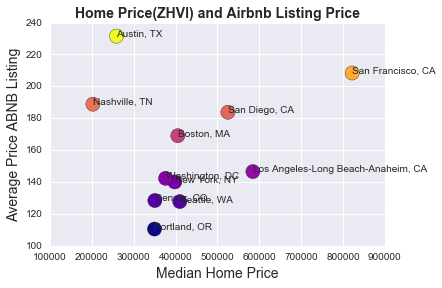

In [50]:
df = concat([statistics['price']['mean'], ZHVI['Zhvi']], axis = 1).dropna()

x = df['Zhvi']
y = df['mean']


n = (df.index).tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y,cmap ='plasma', s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('Median Home Price', fontsize=14)
plt.ylabel('Average Price ABNB Listing', fontsize=14)
plt.title('Home Price(ZHVI) and Airbnb Listing Price', fontsize=14, fontweight='bold')


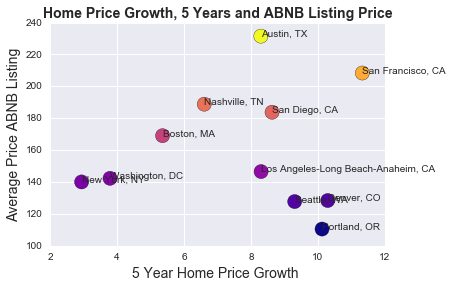

In [51]:
df = concat([statistics['price']['mean'], ZHVI['5Year']], axis = 1).dropna()

x = df['5Year'] *100
y = df['mean']

n = (df.index).tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y,cmap ='plasma', s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
plt.xlabel('5 Year Home Price Growth ', fontsize=14)    
plt.ylabel('Average Price ABNB Listing', fontsize=14)
plt.title('Home Price Growth, 5 Years and ABNB Listing Price', fontsize=14, fontweight='bold')

**TO ADD: Listing Trends and Other Real Estate Metrics**

**TO ADD: Coorelation graph between airbnb variables and real estate variable**

---
# Part 3: Creating Indices and ZHVI Prediction Model

## a) Metrics of Interest & Indices
   1) **Value Index:** This is a index that captures the 'value' of a listing given its price. Value is measured in terms of the size of the listing (average # accommodates, bedrooms, bathrooms). The higher the index the better the value.
    
   2) **Popularity Index:** This index measures the popularity of listings using the average number of reviews and availability of listings as indicators that a listing is popular. The higher the index, the more popular a listing. 

   3) **Ratings Index:** A sum of the average overall rating, value rating and accuracy ratign for listings. The value rating us the users measure of the value of a listing. The accuracy rating captures the users measure of the accuracy of the listing given the host's description. The higher the sum of ratings, the better the listing was reviewed.

   4) **Average Price**

### Value Index

In [40]:
# Avg number of people accomodated per listing in each city
accom = statistics['accommodates']['mean']

# Avg size of the listing in each city
# Sum of bedrooms and bathrooms
size = statistics['bedrooms']['mean'] + statistics['bathrooms']['mean']

value_index = (accom + size) / statistics['price']['mean'] 

### Popularity Index

In [41]:
# Percent Unavailable, the higher the %, the more popular a city
percent_unavail = ((365 - statistics['availability_365']['mean']) / 365)*100

# Mean # of Reviews per city
mean_reviews = statistics['number_of_reviews']['mean']

# Popularity Index = % Unavailable * Mean # Reviews (divided by 1000 for scale)
# The higher the index more reviews, more unavailable, more popular the city
pop_index = percent_unavail * mean_reviews / 1000

### Rating Index

In [42]:
#Guest Listing Rating
mean_rating = statistics['review_scores_rating']['mean'].convert_objects(convert_numeric=True)

#Guest Reviews the Accuracy of Listing
mean_accuracy_rating = statistics['review_scores_accuracy']['mean'].convert_objects(convert_numeric=True)

# Guest Reviews Value of Listing
value_rating = statistics['review_scores_value']['mean'].convert_objects(convert_numeric=True)

# Rating index is the sum of the avg. of three ratings for each city
# Divided by the sum highest possible scores = 100 + 10 + 10 = 120
# Higher the Rating index, the better the stay in each city
rating_index = (mean_rating + mean_accuracy_rating + value_rating) / 120

### Average Price

In [43]:
avg_price = statistics['price']['mean']

**Putting all indices into one dataframe:**

In [44]:
df_metrics = concat([value_index, pop_index, rating_index, avg_price], axis = 1)
df_metrics.columns = ['Value Index', 'Popularity Index', 'Rating Index', 'Average Price']
df_metrics

,Value Index,Popularity Index,Rating Index,Average Price
location,,,,
"Austin, TX",0.032857,0.281731,0.954146,231.503207
"Boston, MA",0.032642,0.968686,0.920971,169.072768
"Washington, DC",0.039779,0.542226,0.935753,142.323251
"Denver, CO",0.051013,0.863656,0.959960,128.392957
"Los Angeles-Long Beach-Anaheim, CA",0.041612,0.658156,0.938389,146.567610
"Nashville, TN",0.045308,1.016340,0.962762,188.836252
"New York, NY",0.036105,0.826225,0.925712,140.057827
"Portland, OR",0.053899,1.524698,0.958531,110.508041
"San Diego, CA",0.039423,0.627646,0.945264,183.789750


## b)  Indices and the ZHVI

**TO ADD: Descriptions of relationships below graph headings below**

### The Popularity Index and ZHVI

(0.2, 1.6)

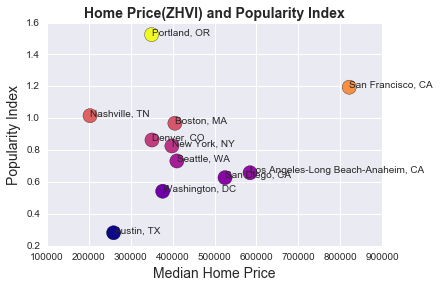

In [64]:
df = concat([pop_index, ZHVI['Zhvi']], axis = 1).dropna()

x = df['Zhvi']
y = df['mean']

n = (df.index).tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y,cmap ='plasma', s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
plt.xlabel('Median Home Price', fontsize=14)    
plt.ylabel('Popularity Index', fontsize=14)
plt.title('Home Price(ZHVI) and Popularity Index', fontsize=14, fontweight='bold')
plt.ylim(.2,1.6)

### The Value Index and ZHVI

(0.025, 0.055)

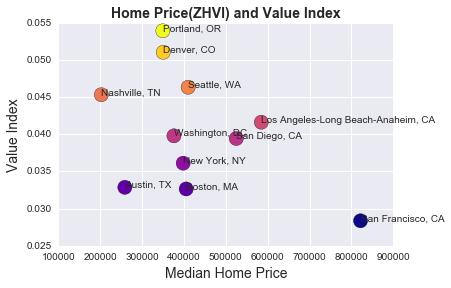

In [61]:
df = concat([value_index, ZHVI['Zhvi']], axis = 1).dropna()

x = df['Zhvi']
y = df['mean']

n = (df.index).tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y,cmap ='plasma', s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
plt.xlabel('Median Home Price', fontsize=14)    
plt.ylabel('Value Index', fontsize=14)
plt.title('Home Price(ZHVI) and Value Index', fontsize=14, fontweight='bold')
plt.ylim(.025,.055)

### The Rating Index and ZHVI

(0.915, 0.97)

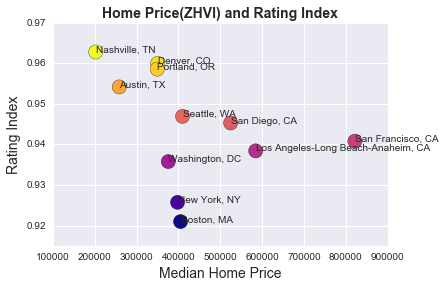

In [63]:
df = concat([rating_index, ZHVI['Zhvi']], axis = 1).dropna()

x = df['Zhvi']
y = df['mean']


n = (df.index).tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y,cmap ='plasma', s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
plt.xlabel('Median Home Price', fontsize=14)   
plt.ylabel('Rating Index', fontsize=14)
plt.title('Home Price(ZHVI) and Rating Index', fontsize=14, fontweight='bold')
plt.ylim(.915, .97)

**TO ADD: Mean Price vs. ZHVI analysis (was plotted in part 2)**

## c) Regression Model for Predicting Indices and Average Price using the ZHVI

**TO ADD: Regression Model**

---
# Part 4: Takeaways for Airbnb

**TO ADD: Charts that summarize main takeaways**
**TO ADD: Charts tha summarize further investigations**